#### Pre-setting block
below block is for module import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec

block for colormaps required for graph plotting

In [2]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("twilight",lut=15)
spec = cm.get_cmap("Spectral",lut =15)
c_blues = [blues(i) for i in range(15)]
c_spec = [spec(i) for i in range(15)]

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_70516/1572848820.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = cm.get_cmap("twilight",lut=15)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_70516/1572848820.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spec = cm.get_cmap("Spectral",lut =15)


blocks for setting range of beta, gamma, alpha

In [8]:
beta = [3.3,3.57,3.84,4.16,4.54,5,5.55,6.25,7.14,8.33,10,16.66,25]
#beta = [66.66,59.75,54.14,49.49,45.58,42.24,39.35,36.84]

In [9]:
garr = np.linspace(0,2,101) # range of gamma value
aarr = np.linspace(0,20,11) # range of alpha value

## Parameter Adjusting block
you can adjust the value of gamma, alpha, and size of the Matrix. 

* value of 'index_gamma' indicates index of gamma array (garr).
* value of 'index_alpha' indicates index of alpha array (aarr).
* value of 'siz' indicates the size of matrix. it should be one of '3','5','7','9's.

**after adjusting the value of each variables, run all the blocks in the file to refresh the datas.**

*i Only below block is allowed to adjust. touch or editing the code of any other blocks is not recommended. editing other block would not be guarranty working properly.*

In [15]:
index_gamma = 10  #default, garr[5] = 0.5
index_alpha = 2  #default, aarr[20] = 1
siz = 5           #defalt, size of matrix = 5

Plotting block - making meshgrid : Data와 파이썬이 같은 경로상에 위치할 경우

In [10]:
for i in beta:
    globals()['data{}'.format(i)] = pd.read_csv('./testfold/NCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(siz,i),header=None,delim_whitespace=True)

for i in beta:
    globals()['datmat{}'.format(i)] = np.zeros((len(garr),len(aarr)))

for k in beta:
    for i in range(len(garr)):
        for j in range(len(aarr)):
            globals()['datmat{}'.format(k)][i][j] = globals()['data{}'.format(k)].loc[i][j]

Plotting block - making meshgrid : 데이터와 주피터 노트북 파일이 다른 경로상에 위치할 경우

In [16]:
for i in beta:
    globals()['data{}'.format(i)] = pd.read_csv('./NCA/Nsize{}/NCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(siz,siz,i),header=None,delim_whitespace=True)

for i in beta:
    globals()['datmat{}'.format(i)] = np.zeros((len(garr),len(aarr)))

for k in beta:
    for i in range(len(garr)):
        for j in range(len(aarr)):
            globals()['datmat{}'.format(k)][i][j] = globals()['data{}'.format(k)].loc[i][j]

##### FIX GAMMA, CHANGE ALPHA

run this block to check the changing the value of Chi_sp per fixed gamma

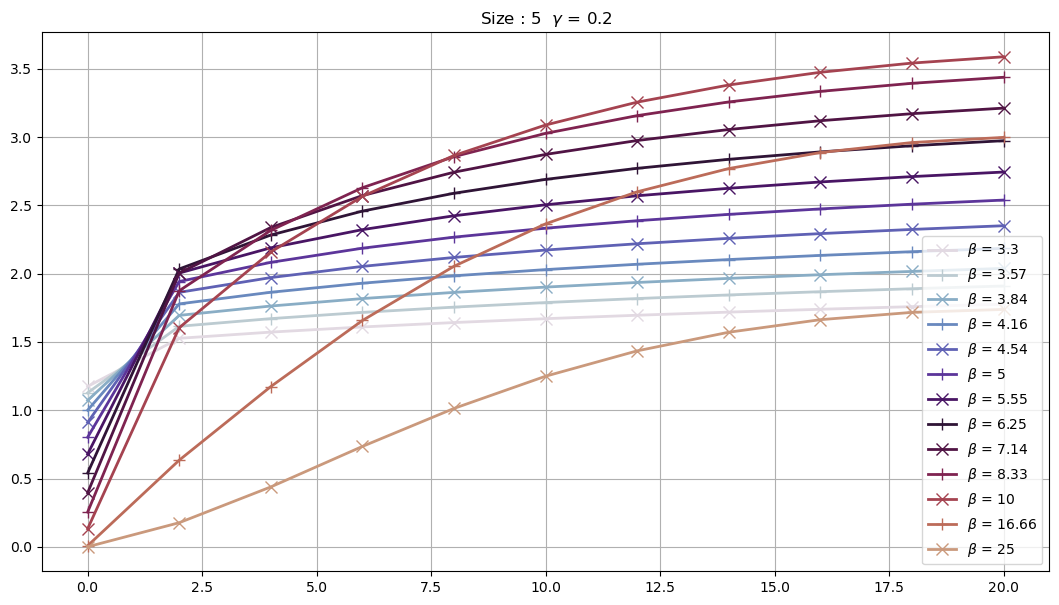

In [17]:
for i in beta:
    globals()['gamarr{}'.format(i)]=[]

for k in beta:
    for j in range(len(aarr)):
        if type(index_gamma) == type(0):
            globals()['gamarr{}'.format(k)].append(globals()['data{}'.format(k)].loc[index_gamma][j])
        else:
            None

fig = plt.figure(figsize=(13,7))
#plt.title(r"$\alpha$ = " + str(aarr[10]))

plt.title("Size : " + str(siz) + r"  $\gamma$ = " + str(garr[index_gamma]))
a = 0
for i in beta:
    if a%2 == 0:
        mark = 'x'
    if a%2 != 0:
        mark = '+'
    plt.plot(aarr,globals()['gamarr{}'.format(i)],color=c_blues[a],label = r"$\beta$ = " + str(i) , linewidth = 2 , marker = mark , markersize = 8 )
    
    a += 1

plt.grid()
plt.legend()
plt.show()

##### FIX ALPHA,CHANGE GAMMA


run this block to check the changing the value of Chi_sp per fixed alpha

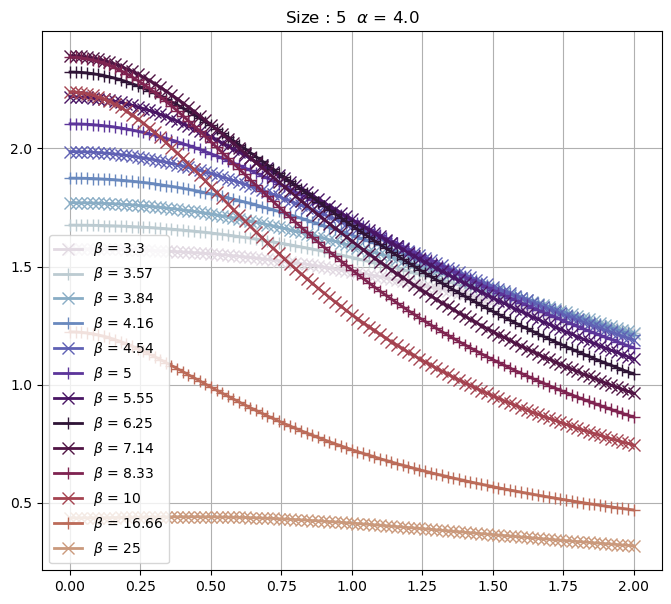

In [18]:
for i in beta:
    globals()['alparr{}'.format(i)]=[]

for k in beta:
    for j in range(len(garr)):
        if type(index_alpha) == type(0):
            globals()['alparr{}'.format(k)].append(globals()['data{}'.format(k)].loc[j][index_alpha])
        else:
            None

fig = plt.figure(figsize=(8,7))
#plt.title(r"$\alpha$ = " + str(aarr[10]))
plt.title("Size : " + str(siz) + r"  $\alpha$ = " + str(aarr[index_alpha]))
a = 0
for i in beta:
    if a%2 == 0:
        mark = 'x'
    if a%2 != 0:
        mark = '+'
    plt.plot(garr,globals()['alparr{}'.format(i)],color=c_blues[a],label = r"$\beta$ = " + str(i) , linewidth = 2 , marker = mark , markersize = 8 )
    
    a += 1

plt.grid()
plt.legend()
plt.show()

##### 3d plots
run this block to check the 3d plots in total range of alpha and gamma. this block does not depend on 'index_alpha' and 'index_gamma'.

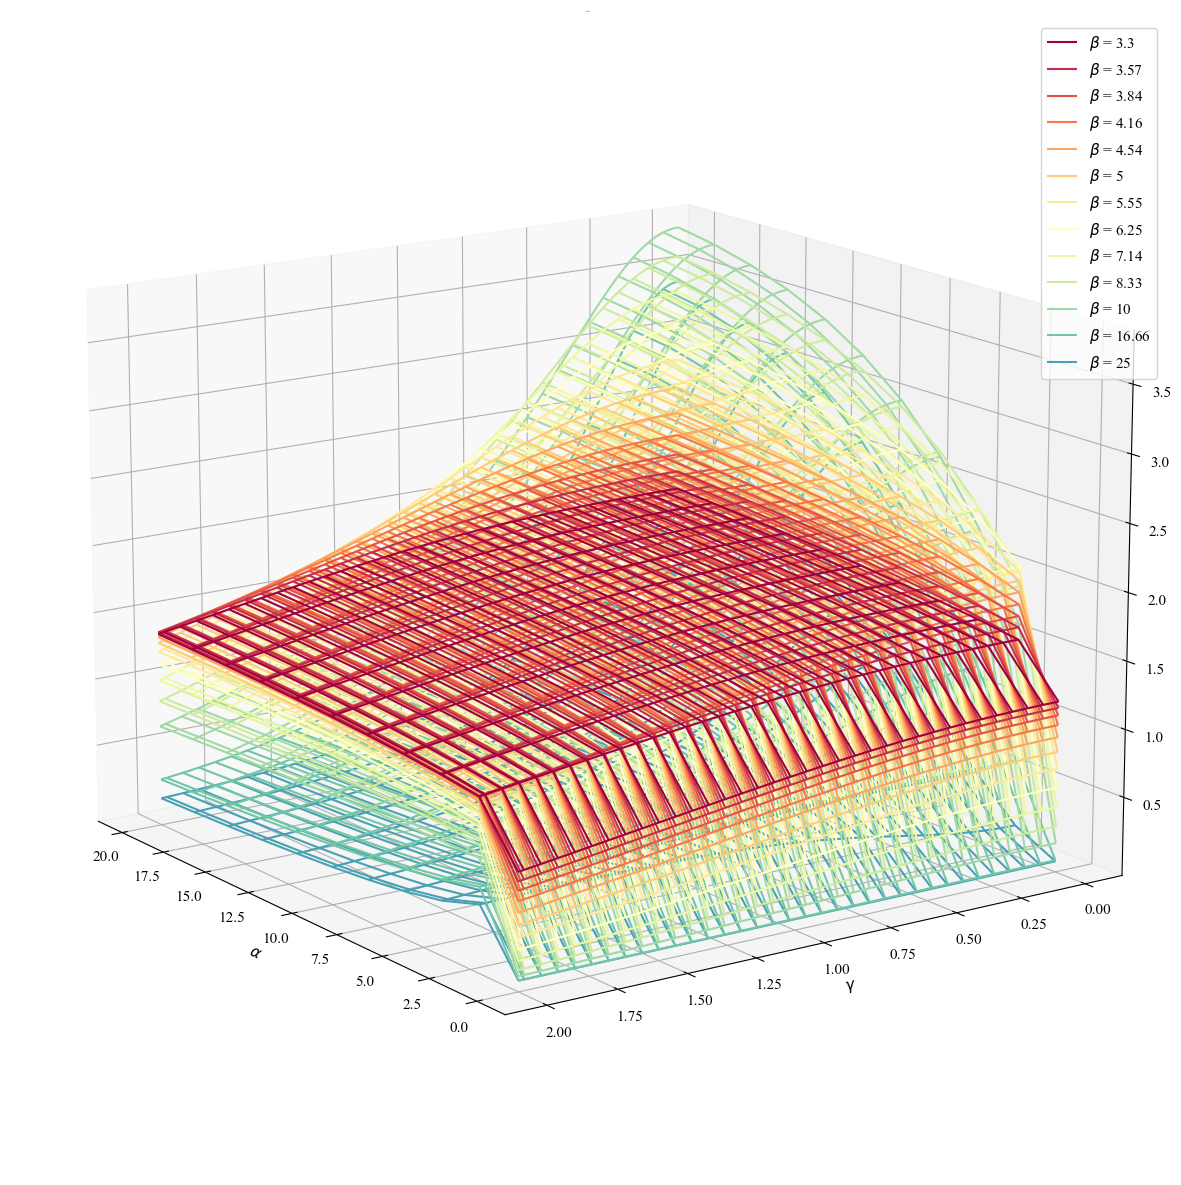

In [19]:

fig = plt.figure(figsize=(15,15))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})
ax = fig.add_subplot(projection='3d')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

mpl.rcParams['axes.linewidth'] = 2.0

X,Y = np.meshgrid(aarr,garr)
for i in beta:
    globals()['Z{}'.format(i)] = globals()['datmat{}'.format(i)]

a = 0

for i in beta:
    ax.plot_wireframe(X,Y,globals()['Z{}'.format(i)],color=c_spec[a],label=r'$\beta$ = ' + str(i))
    a+=1


plt.title("3D plot",fontsize = 1)
ax.view_init(15, 145)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\gamma$')
ax.legend()